In [13]:
# Set up
%pylab inline

# Params
DATADIR = "/storage/mgymrek/gtex-estrs/revision/"
RESULTSDIR = "/storage/mgymrek/gtex-estrs/revision/figures"
NUCDIR = "/storage/mgymrek/gtex-estrs/revision/homer-plots/composite/"

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Import libraries
import os
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.stats.multitest
from sklearn.cluster import KMeans

# Load nucleosome data by period
nucdata = []
nucdata_all = []
dnasedata = []
dnasedata_all = []

TISSUES = ["Heart-LeftVentricle", "Lung", "Artery-Tibial", "Nerve-Tibial"]
dnasedata_by_tissue = {}
for t in TISSUES: dnasedata_by_tissue[t] = []

dnasecols = ["dist","cov.GM12878","+.GM12878","-.GM12878",
                "cov.heart","+.heart","-.heart",
                "cov.lung","+.lung","-.lung",
                "cov.aheart","+.aheart","-.aheart",
                "cov.tibial-artery","+.tibial-artery","-.tibial-artery",
                "cov.tibial-nerve","+.tibial-nerve","-.tibial-nerve"]
    
for period in [1]: # TODO add others
    d = pd.read_csv(os.path.join(NUCDIR, "ALLCAUSAL_nucl_period%s.bed"%period), sep="\t")
    d.columns = ["dist","cov","+","-"]
    nucdata.append(d)
    
    d = pd.read_csv(os.path.join(NUCDIR, "ALLSTRs_nucl_period%s.bed"%period), sep="\t")
    d.columns = ["dist","cov","+","-"]
    nucdata_all.append(d)
    
    d = pd.read_csv(os.path.join(NUCDIR, "ALLCAUSAL_dnase_period%s.bed"%period), sep="\t")
    d.columns = dnasecols
    dnasedata.append(d)
    
    d = pd.read_csv(os.path.join(NUCDIR, "ALLSTRs_dnase_period%s.bed"%period), sep="\t")
    d.columns = dnasecols
    dnasedata_all.append(d)
    
    #for t in TISSUES:
    #    d = pd.read_csv(os.path.join(NUCDIR, "%s_dnase_period%s.bed"%(tissue, period)), sep="\t")
    #    d.columns = dnasecols
    #    dnasedata_by_tissue[t].append(d)

Populating the interactive namespace from numpy and matplotlib


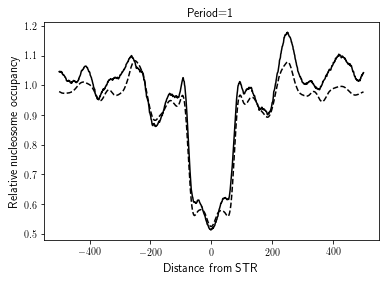

In [11]:
# Plot nucleosome density by period - causal vs. all STRs
for period in [1]: # TODO add others
    d = nucdata[period-1]
    dall = nucdata_all[period-1]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(d["dist"],d["cov"], color="black")
    ax.plot(dall["dist"],dall["cov"], color="black", linestyle="dashed")
    ax.set_xlabel("Distance from STR", size=12)
    ax.set_ylabel("Relative nucleosome occupancy", size=12)
    ax.set_title("Period=%s"%period);

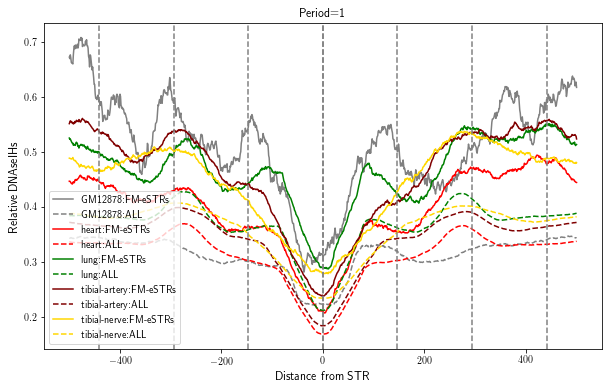

In [22]:
# Plot DNAseI by period - causal vs. all STRs, for each tissue type
prefcol = {
    "GM12878": "gray",
    "heart": "red",
    "aheart": "pink",
    "lung": "green",
    "tibial-artery": "maroon",
    "tibial-nerve": "gold"
}

for period in [1]: # TODO add others
    d = dnasedata[period-1]
    dall = dnasedata_all[period-1]
    fig = plt.figure()
    fig.set_size_inches((10,6))
    ax = fig.add_subplot(111)
    for pref in ["GM12878","heart","lung","tibial-artery","tibial-nerve"]:
        ax.plot(d["dist"],d["cov.%s"%pref], color=prefcol[pref], label=pref+":FM-eSTRs")
        ax.plot(dall["dist"],dall["cov.%s"%pref], color=prefcol[pref], linestyle="dashed", label=pref+":ALL")
    ax.set_xlabel("Distance from STR", size=12)
    ax.set_ylabel("Relative DNAseIHs", size=12)
    ax.set_title("Period=%s"%period)
    ax.legend(loc="lower left")
    
    for mult in range(4):
        offset = 0
        ax.axvline(x=mult*147+off, linestyle="dashed", color="gray")
        ax.axvline(x=-1*mult*147, linestyle="dashed", color="gray")